In [26]:
#Importamos la base
import pandas as pd

df = pd.read_csv('/content/stocolmo_inicial.csv')
display(df.head())

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,142695,https://www.airbnb.com/rooms/142695,20250627030620,2025-06-27,city scrape,Family Friendly Sleek Colorful Designer Aparment,Experience a charming and stylish apartment lo...,A calm hidden area close to the city centre,https://a0.muscache.com/pictures/hosting/Hosti...,333509,...,5.00,4.00,5.00,NaN,f,1,1,0,0,1.00
1,145320,https://www.airbnb.com/rooms/145320,20250627030620,2025-06-27,city scrape,In the middle of it all - with a view!,"My place is good for couples, friends, and sol...","The flat is in the area of Södermalm, the youn...",https://a0.muscache.com/pictures/9172a792-604c...,703851,...,4.94,4.96,4.80,NaN,f,2,0,2,0,0.72
2,164448,https://www.airbnb.com/rooms/164448,20250627030620,2025-06-28,city scrape,Double room in central Stockholm with Wi-Fi,I am renting out a nice double room on the top...,NaN,https://a0.muscache.com/pictures/f56d8d10-a7fa...,784312,...,4.97,4.84,4.76,NaN,f,2,0,2,0,2.60
3,220851,https://www.airbnb.com/rooms/220851,20250627030620,2025-06-27,city scrape,One room in appartement,Welcome!,Many restaurangs wery close and walkingdistanc...,https://a0.muscache.com/pictures/2085606/7a706...,412283,...,4.88,4.82,4.71,NaN,f,2,1,1,0,0.39
4,238411,https://www.airbnb.com/rooms/238411,20250627030620,2025-06-27,previous scrape,Cozy apartment in central Stockholm,NaN,"Restaurants, cafés, museums, art galleries, pa...",https://a0.muscache.com/pictures/2806060/7fc68...,1250232,...,4.95,4.85,4.64,NaN,f,1,1,0,0,0.67


In [27]:
# Ver cuántos nulos tiene cada columna
nulos = df.isnull().sum()
nulos = nulos[nulos > 0]

print(nulos)


description                      220
neighborhood_overview           3429
host_name                        198
host_since                       198
host_location                   1160
host_about                      3027
host_response_time              1721
host_response_rate              1721
host_acceptance_rate            1370
host_is_superhost                 29
host_thumbnail_url               198
host_picture_url                 198
host_neighbourhood              3907
host_listings_count              198
host_total_listings_count        198
host_verifications               198
host_has_profile_pic             198
host_identity_verified           198
neighbourhood                   3429
neighbourhood_group_cleansed    5315
bathrooms                       1528
bathrooms_text                    10
bedrooms                         248
beds                            1528
price                           1554
minimum_minimum_nights             1
maximum_minimum_nights             1
m

In [28]:
#Imputamos las que sean de texto como description o host_name con "No Information"
cols_texto_elegidas = [
    "name",
    "description",
    "neighborhood_overview",
    "host_name",
    "host_location",
    "host_about",
    "host_response_time",
    "host_response_rate",
    "host_acceptance_rate", "host_since",
    "host_thumbnail_url",
    "host_picture_url", "has_availability",
    "host_neighbourhood",
    "neighbourhood",
    "neighbourhood_cleansed",
    "property_type",
    "room_type",
    "bathrooms_text",
    "calendar_updated",
    "first_review",
    "last_review",
    "license", "host_is_superhost",
    "host_has_profile_pic",
    "host_identity_verified", "neighbourhood_group_cleansed", "host_verifications"
]

df[cols_texto_elegidas] = df[cols_texto_elegidas].fillna("No Information")

In [29]:
# Convertir columnas de fechas
cols_fechas = ["host_since", "first_review", "last_review"]

for col in cols_fechas:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

# Verificar rangos de fechas
for col in cols_fechas:
    if col in df.columns:
        print(f"\nColumna: {col}")
        print("Mínima:", df[col].min())
        print("Máxima:", df[col].max())
        print("Nulos:", df[col].isnull().sum())



Columna: host_since
Mínima: 2008-11-21 00:00:00
Máxima: 2025-06-25 00:00:00
Nulos: 198

Columna: first_review
Mínima: 2011-07-30 00:00:00
Máxima: 2025-06-27 00:00:00
Nulos: 1146

Columna: last_review
Mínima: 2013-11-09 00:00:00
Máxima: 2025-06-29 00:00:00
Nulos: 1146


In [30]:
#Imputamos por mediana


# Columnas continuas de reviews
cols_reviews = [
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",
    "reviews_per_month", "host_listings_count", "host_total_listings_count"
]

# Imputar nulos con la mediana
for col in cols_reviews:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())



# Limpiamos símbolos de $ y comas en price y revenue
df["price"] = (
    df["price"]
    .astype(str)
    .str.replace("[$,]", "", regex=True)
    .astype(float)
)

df["estimated_revenue_l365d"] = (
    df["estimated_revenue_l365d"]
    .astype(str)
    .str.replace("[$,]", "", regex=True)
    .astype(float)
)

# Ahora imputamos las columnas con mediana
cols_mediana = [
    "bathrooms",
    "bedrooms",
    "beds",
    "price",
    "estimated_revenue_l365d",
    "minimum_minimum_nights",
    "maximum_minimum_nights",
    "minimum_maximum_nights",
    "maximum_maximum_nights"
]

for col in cols_mediana:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())



In [31]:
# Ver cuántos nulos tiene cada columna
nulos = df.isnull().sum()
nulos = nulos[nulos > 0]

print(nulos)

host_since       198
first_review    1146
last_review     1146
dtype: int64


Limpieza de Outliers

In [32]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

# Lista de columnas numéricas
cols_numericas = df.select_dtypes(include=['number']).columns.tolist()

# Dropdown para elegir columna
dropdown = widgets.Dropdown(
    options=cols_numericas,
    description='Columna:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Botón para imputar outliers
button = widgets.Button(
    description="Imputar outliers con mediana",
    button_style='warning'
)

output = widgets.Output()

def mostrar_boxplot(col):
    with output:
        output.clear_output()
        # Mostrar boxplot
        plt.figure(figsize=(6,4))
        df.boxplot(column=col)
        plt.title(f"Boxplot de {col}")
        plt.show()

        # Estadísticas
        media = df[col].mean()
        std = df[col].std()
        limite_inf = media - 3*std
        limite_sup = media + 3*std
        outliers = ((df[col] < limite_inf) | (df[col] > limite_sup)).sum()
        print(f"Media: {media:.2f}, Std: {std:.2f}")
        print(f"Límite inferior: {limite_inf:.2f}, Límite superior: {limite_sup:.2f}")
        print(f"Outliers detectados: {outliers}")

def on_dropdown_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        mostrar_boxplot(change['new'])

def on_button_click(b):
    col = dropdown.value
    media = df[col].mean()
    std = df[col].std()
    limite_inf = media - 3*std
    limite_sup = media + 3*std
    mediana = df[col].median()

    # Reemplazar outliers por mediana
    df.loc[(df[col] < limite_inf) | (df[col] > limite_sup), col] = mediana
    with output:
        print(f"\nOutliers de '{col}' imputados con la mediana ({mediana}).")
    mostrar_boxplot(col)

dropdown.observe(on_dropdown_change)
button.on_click(on_button_click)

display(dropdown, button, output)

# Mostrar primero la primera columna por defecto
mostrar_boxplot(cols_numericas[0])


Dropdown(description='Columna:', layout=Layout(width='50%'), options=('id', 'scrape_id', 'host_id', 'host_list…

Button(button_style='warning', description='Imputar outliers con mediana', style=ButtonStyle())

Output()

In [33]:
import numpy as np

# Seleccionar solo las columnas numéricas
num_cols = df.select_dtypes(include=[np.number]).columns

# Función para eliminar outliers por desviación estándar
def remove_outliers_std(df, cols, threshold=3):
    df_clean = df.copy()
    for col in cols:
        mean = df[col].mean()
        std = df[col].std()
        limit_low = mean - threshold * std
        limit_high = mean + threshold * std
        df_clean = df_clean[(df_clean[col] >= limit_low) & (df_clean[col] <= limit_high)]
    return df_clean

# Aplicar a todo el dataset numérico
df_clean = remove_outliers_std(df, num_cols, threshold=3)

print("Tamaño original:", df.shape)
print("Tamaño sin outliers:", df_clean.shape)

Tamaño original: (5315, 79)
Tamaño sin outliers: (4161, 79)


In [34]:
#Definimos los 6 pares de variables
pairs = [
    ("host_acceptance_rate", "host_response_rate"),
    ("review_scores_rating", "calculated_host_listings_count"),
    ("host_acceptance_rate", "price"),
    ("availability_365", "number_of_reviews"),
    ("host_acceptance_rate", "number_of_reviews"),
    ("reviews_per_month", "review_scores_communication")
]

In [35]:
#Filtramos los 4 tipos de habitación
room_types = ["Entire home/apt", "Private room", "Shared room", "Hotel room"]

In [36]:
cols_porcentaje = ["host_acceptance_rate", "host_response_rate"]

for col in cols_porcentaje:
    if col in df_clean.columns:
        df_clean[col] = (
            df_clean[col]
            .astype(str)
            .str.replace("%", "", regex=True)  # quitamos el símbolo %
            .replace("No Information", np.nan) # por si quedó tu etiqueta
            .astype(float)
        )

In [37]:
for col in cols_porcentaje:
    print(col, df_clean[col].dtype, df_clean[col].unique()[:10])


host_acceptance_rate float64 [ 83.  35.   0. 100.  13.  43.  69.  73.  nan  40.]
host_response_rate float64 [ 80.   0. 100.  nan  57.  75.  56.  83.  33.  60.]


In [38]:
df_clean["room_type"].value_counts()


,count
room_type,
Entire home/apt,3497
Private room,656
Hotel room,8


In [39]:
# Guardar con un nuevo nombre
df.to_csv("estocolmofinal.csv", index=False)


In [40]:
#Cargar archivo csv
df_limpia = pd.read_csv('estocolmofinal.csv')
df_limpia.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,142695,https://www.airbnb.com/rooms/142695,20250627030620,2025-06-27,city scrape,Family Friendly Sleek Colorful Designer Aparment,Experience a charming and stylish apartment lo...,A calm hidden area close to the city centre,https://a0.muscache.com/pictures/hosting/Hosti...,333509,...,5.00,4.00,5.00,No Information,f,1,1,0,0,1.00
1,145320,https://www.airbnb.com/rooms/145320,20250627030620,2025-06-27,city scrape,In the middle of it all - with a view!,"My place is good for couples, friends, and sol...","The flat is in the area of Södermalm, the youn...",https://a0.muscache.com/pictures/9172a792-604c...,703851,...,4.94,4.96,4.80,No Information,f,2,0,2,0,0.72
2,164448,https://www.airbnb.com/rooms/164448,20250627030620,2025-06-28,city scrape,Double room in central Stockholm with Wi-Fi,I am renting out a nice double room on the top...,No Information,https://a0.muscache.com/pictures/f56d8d10-a7fa...,784312,...,4.97,4.84,4.76,No Information,f,2,0,2,0,2.60
3,220851,https://www.airbnb.com/rooms/220851,20250627030620,2025-06-27,city scrape,One room in appartement,Welcome!,Many restaurangs wery close and walkingdistanc...,https://a0.muscache.com/pictures/2085606/7a706...,412283,...,4.88,4.82,4.71,No Information,f,2,1,1,0,0.39
4,238411,https://www.airbnb.com/rooms/238411,20250627030620,2025-06-27,previous scrape,Cozy apartment in central Stockholm,No Information,"Restaurants, cafés, museums, art galleries, pa...",https://a0.muscache.com/pictures/2806060/7fc68...,1250232,...,4.95,4.85,4.64,No Information,f,1,1,0,0,0.67


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

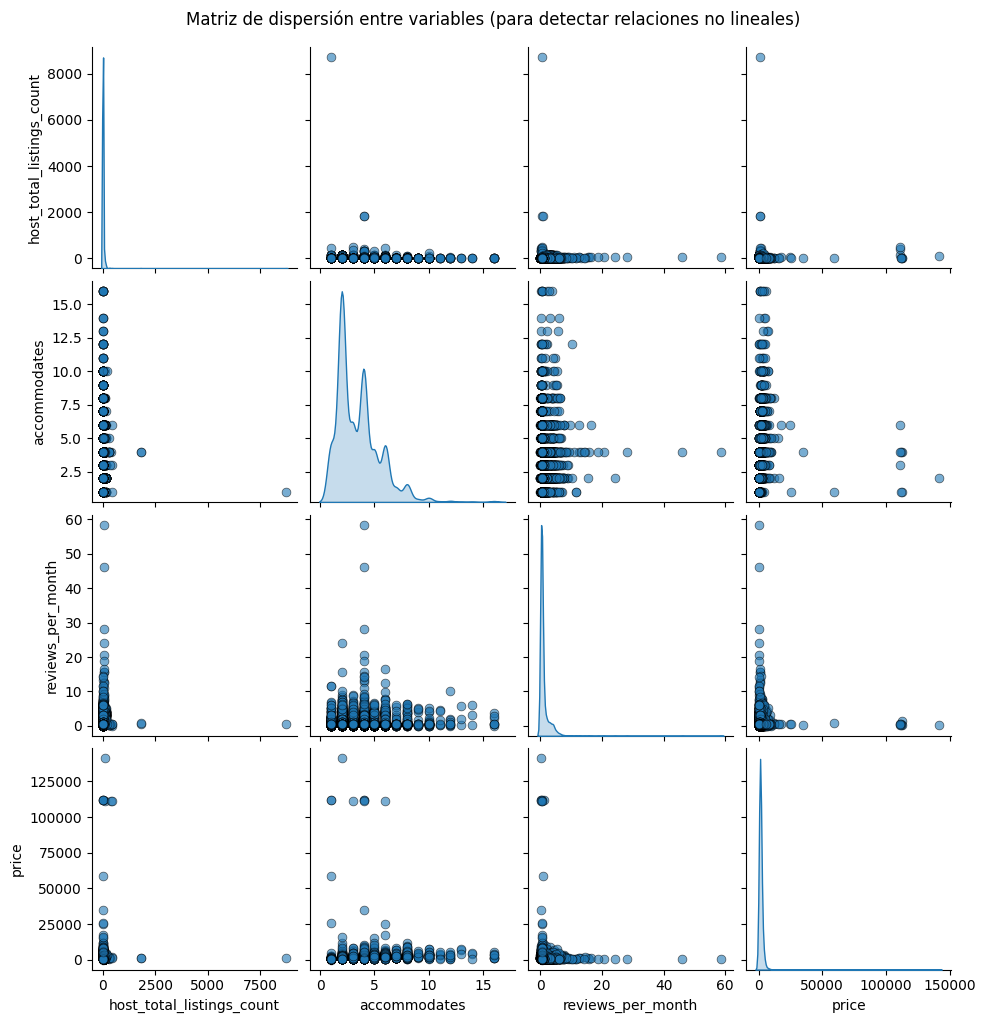

In [42]:
# Variables a analizar
vars = ['host_response_rate', 'host_acceptance_rate', 'host_total_listings_count',
        'accommodates', 'reviews_per_month', 'price']

# Matriz de dispersión
sns.pairplot(df[vars], diag_kind='kde', plot_kws={'alpha':0.6, 's':40, 'edgecolor':'k'})
plt.suptitle('Matriz de dispersión entre variables (para detectar relaciones no lineales)', y=1.02)
plt.show()

In [43]:
# === Elige tus pares ===
x1 = df_limpia['accommodates'].to_numpy(dtype=float)
y1 = df_limpia['price'].to_numpy(dtype=float)

x2 = df_limpia['reviews_per_month'].to_numpy(dtype=float)
y2 = df_limpia['price'].to_numpy(dtype=float)


In [44]:
# =====================================
# MODELO 1 - Función Cuadrática
# y = a*x^2 + b*x + c
# =====================================

# Declaramos variables
Vars_Indep = df['accommodates']
Var_Dep = df['price']

# Redefinimos
x = Vars_Indep.values
y = Var_Dep.values

# Definimos la función
def func1(x, a, b, c):
    return a*x**2 + b*x + c

# Ajuste de parámetros
parametros1, covs = curve_fit(func1, x, y)

# Coeficientes del modelo
print("Coeficientes del Modelo 1 (a, b, c):")
print(parametros1)

# Predicciones
y_pred1 = func1(x, *parametros1)

# Tabla de predicciones
y_pred1_tabla = pd.DataFrame({'accommodates': x, 'y_pred1': y_pred1})
print("\nTabla de predicciones del Modelo 1:")
print(y_pred1_tabla.head(15))


Coeficientes del Modelo 1 (a, b, c):
[-10.33554042 334.35173269 784.29823131]

Tabla de predicciones del Modelo 1:
    accommodates      y_pred1
0              5  2197.668384
1              2  1411.659535
2              2  1411.659535
3              1  1108.314424
4              2  1411.659535
5              1  1108.314424
6              4  1956.336515
7              4  1956.336515
8              4  1956.336515
9              2  1411.659535
10             4  1956.336515
11             2  1411.659535
12             1  1108.314424
13             6  2418.329172
14             1  1108.314424


/tmp/ipython-input-1602887218.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color="blue")
/tmp/ipython-input-1602887218.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1, 'bo', label="y-predecida con y=a*x^2+b*x+c", color="red")


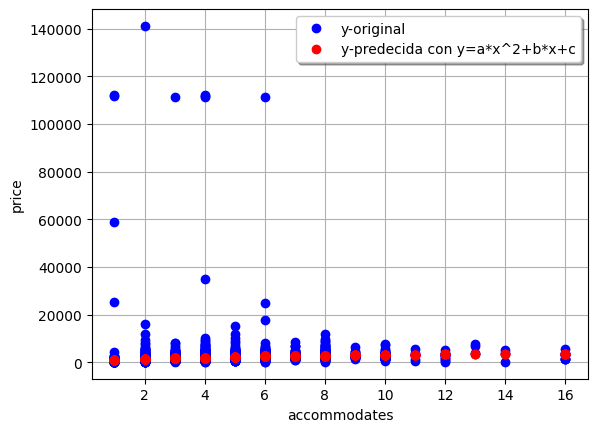

In [45]:
# Gráfica comparativa
plt.plot(x, y, 'bo', label="y-original", color="blue")
plt.plot(x, y_pred1, 'bo', label="y-predecida con y=a*x^2+b*x+c", color="red")
plt.xlabel('accommodates')
plt.ylabel('price')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()



In [46]:
# Coeficiente de determinación (R²)
R2_Modelo1 = r2_score(y, y_pred1)
print("\nCoeficiente de determinación (R²) del Modelo 1:", R2_Modelo1)



Coeficiente de determinación (R²) del Modelo 1: 0.010090483430839181


In [47]:

# Coeficiente de correlación (R)
R_Modelo1 = np.sqrt(abs(R2_Modelo1))
print("Coeficiente de correlación (R) del Modelo 1:", R_Modelo1)

Coeficiente de correlación (R) del Modelo 1: 0.10045139835183571


In [48]:
# =====================================
# MODELO 2 - Función Cociente entre Polinomios
# y = (a*x^2 + b)/(c*x^2)
# =====================================

# Declaramos variables
Vars_Indep = df['reviews_per_month']
Var_Dep = df['price']

# Redefinimos
x = Vars_Indep.values
y = Var_Dep.values

# Definimos la función
def func2(x, a, b, c):
    return ((a*x**2 + b)/(c*x**2))

# Ajuste de parámetros
parametros2, covs2 = curve_fit(func2, x, y)

# Coeficientes del modelo
print("\nCoeficientes del Modelo 2 (a, b, c):")
print(parametros2)

# Predicciones
y_pred2 = func2(x, *parametros2)

# Tabla de predicciones
y_pred2_tabla = pd.DataFrame({'reviews_per_month': x, 'y_pred2': y_pred2})
print("\nTabla de predicciones del Modelo 2:")
print(y_pred2_tabla.head(15))




Coeficientes del Modelo 2 (a, b, c):
[ 6.68868134e+05 -1.88516000e+01  3.73714064e+02]

Tabla de predicciones del Modelo 2:
    reviews_per_month      y_pred2
0                1.00  1789.735380
1                0.72  1789.688517
2                2.60  1789.778362
3                0.39  1789.454174
4                0.67  1789.673452
5                2.63  1789.778531
6                0.03  1733.737031
7                4.61  1789.783450
8                0.43  1789.513007
9                0.24  1788.910061
10               0.61  1789.650258
11               0.10  1784.741432
12               0.16  1787.815358
13               0.07  1779.491148
14               0.28  1789.142407


/tmp/ipython-input-3607802288.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color="blue")
/tmp/ipython-input-3607802288.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred2, 'bo', label="y-predecida con y=(a*x^2+b)/(c*x^2)", color="red")


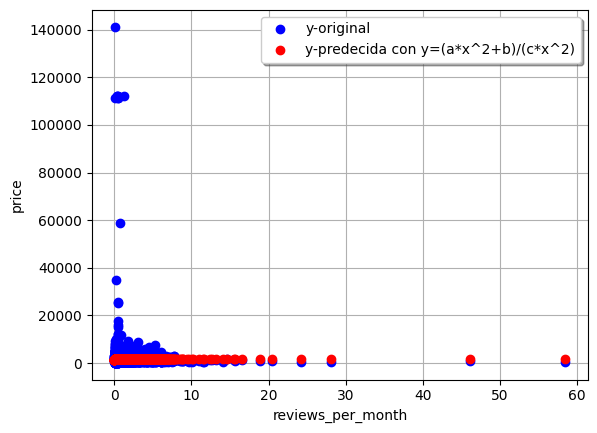

In [49]:
# Gráfica comparativa
plt.plot(x, y, 'bo', label="y-original", color="blue")
plt.plot(x, y_pred2, 'bo', label="y-predecida con y=(a*x^2+b)/(c*x^2)", color="red")
plt.xlabel('reviews_per_month')
plt.ylabel('price')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()



In [50]:

# Coeficiente de determinación (R²)
R2_Modelo2 = r2_score(y, y_pred2)
print("\nCoeficiente de determinación (R²) del Modelo 2:", R2_Modelo2)



Coeficiente de determinación (R²) del Modelo 2: 5.457011800880096e-05


In [51]:

# Coeficiente de correlación (R)
R_Modelo2 = np.sqrt(abs(R2_Modelo2))
print("Coeficiente de correlación (R) del Modelo 2:", R_Modelo2)

Coeficiente de correlación (R) del Modelo 2: 0.007387158994417337
